### Question 1: On a dataset of your choice perform Exploratory Data Anlaysis and drive insights using statistics & visualizations.

In [2]:
### Use Pandas to load the dataset
### Use Seaborn to perform visualization

### Question 2: Perform classification using KNN and create a plot to show Value of K vs Accuracy for 50 values of K.

### Question 3: Use PyCaret to perform series of following steps

In [3]:
### Run this cell to install PyCaret
!pip install pycaret

     |████████████████████████████████| 288 kB 10.1 MB/s 
     |████████████████████████████████| 1.3 MB 51.7 MB/s 
     |████████████████████████████████| 113 kB 68.2 MB/s 
     |████████████████████████████████| 167 kB 66.0 MB/s 
     |████████████████████████████████| 6.8 MB 40.7 MB/s 
     |████████████████████████████████| 1.7 MB 70.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 2.0 MB 43.0 MB/s 
     |████████████████████████████████| 261 kB 49.0 MB/s 
     |████████████████████████████████| 16.9 MB 42 kB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 10.1 MB 66.8 MB/s 
     |████████████████████████████████| 102 kB 10.6 MB/s 
     |████████████████████████████████| 675 kB 53.3 MB/s 
     |█████████████████

#### Question 3-a: Setup a PyCaret experiment on the dataset of your choice.

#### Question 3-b: Check for data imbalance and solve it using PyCaret

#### Question 3-c: Compare all the ML models according to F-1 Score

#### Question 3-d: Select the model which performs the best according to F-1 Score.

#### Question 3-e: Perform the hyperparameter tuning of the model

#### Question 3-f: Compare the and note down the changes which you noticed before and after hyperparameter tuning of the model.

## Links to find and download the dataset
1. Kaggle: https://www.kaggle.com/datasets
2. UCI ML Repository: https://archive.ics.uci.edu/ml/datasets.php


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [6]:
df = pd.read_csv("sucides.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [8]:
df.shape

(27820, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [10]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [11]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [12]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [13]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [14]:
#year will consider as categorical variable

df['year'] = df['year'].astype('object')

In [15]:
df['year'].dtype

dtype('O')

In [16]:
df.dtypes

country                object
year                   object
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [17]:
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(',','')#.astype('Int64')

In [18]:
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].astype(int)

In [19]:
df[' gdp_for_year ($) '].dtype

dtype('int64')

In [20]:
df.dtypes


country                object
year                   object
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)       int64
gdp_per_capita ($)      int64
generation             object
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  object 
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  int64  
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [22]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [23]:
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [24]:
display(df['suicides/100k pop'].max())
display(df['suicides/100k pop'].min())

224.97

0.0

In [25]:
unique_year = df['year'].nunique()
unique_year

32

In [26]:
group_year = df.groupby('year').sum()
group_year

,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
year,,,,,,
1985,116063,1008600086,6811.89,310.428,110964754234500,3508548
1986,120670,1029909613,6579.84,0.000,132609631982868,4104636
1987,126842,1095029726,7545.45,0.000,155769882274200,5645760
1988,121026,1054094424,7473.13,0.000,175557691204476,5870508
1989,160244,1225514347,8036.54,0.000,191618261647176,6068424
1990,193361,1466620100,9878.75,429.480,236464399957008,7531260
1991,198020,1489988384,10321.06,0.000,252102888610440,7782096
1992,211473,1569539447,10528.88,0.000,268107812488032,8195232
1993,221565,1530416654,10790.29,0.000,271037019424788,8231796


In [27]:
print("Min: ")
print(df.min())

print("Max: ")
print(df.max())

Min: 
country                   Albania
year                         1985
sex                        female
age                   15-24 years
suicides_no                     0
population                    278
suicides/100k pop               0
country-year          Albania1987
HDI for year                0.483
 gdp_for_year ($)        46919625
gdp_per_capita ($)            251
generation                Boomers
dtype: object
Max: 
country                   Uzbekistan
year                            2016
sex                             male
age                        75+ years
suicides_no                    22338
population                  43805214
suicides/100k pop             224.97
country-year          Uzbekistan2014
HDI for year                   0.944
 gdp_for_year ($)     18120714000000
gdp_per_capita ($)            126352
generation                    Silent
dtype: object


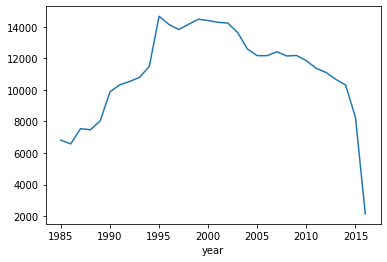

In [28]:
year_wise_suicides = group_year['suicides/100k pop']
year_wise_suicides.plot()

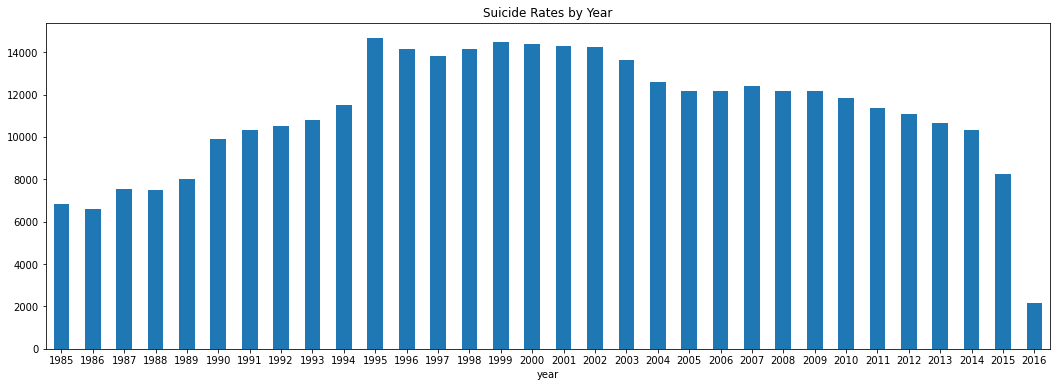

In [29]:
plt.subplots(figsize=(18,6))
group_year['suicides/100k pop'].plot.bar(rot=0)
plt.title("Suicide Rates by Year");

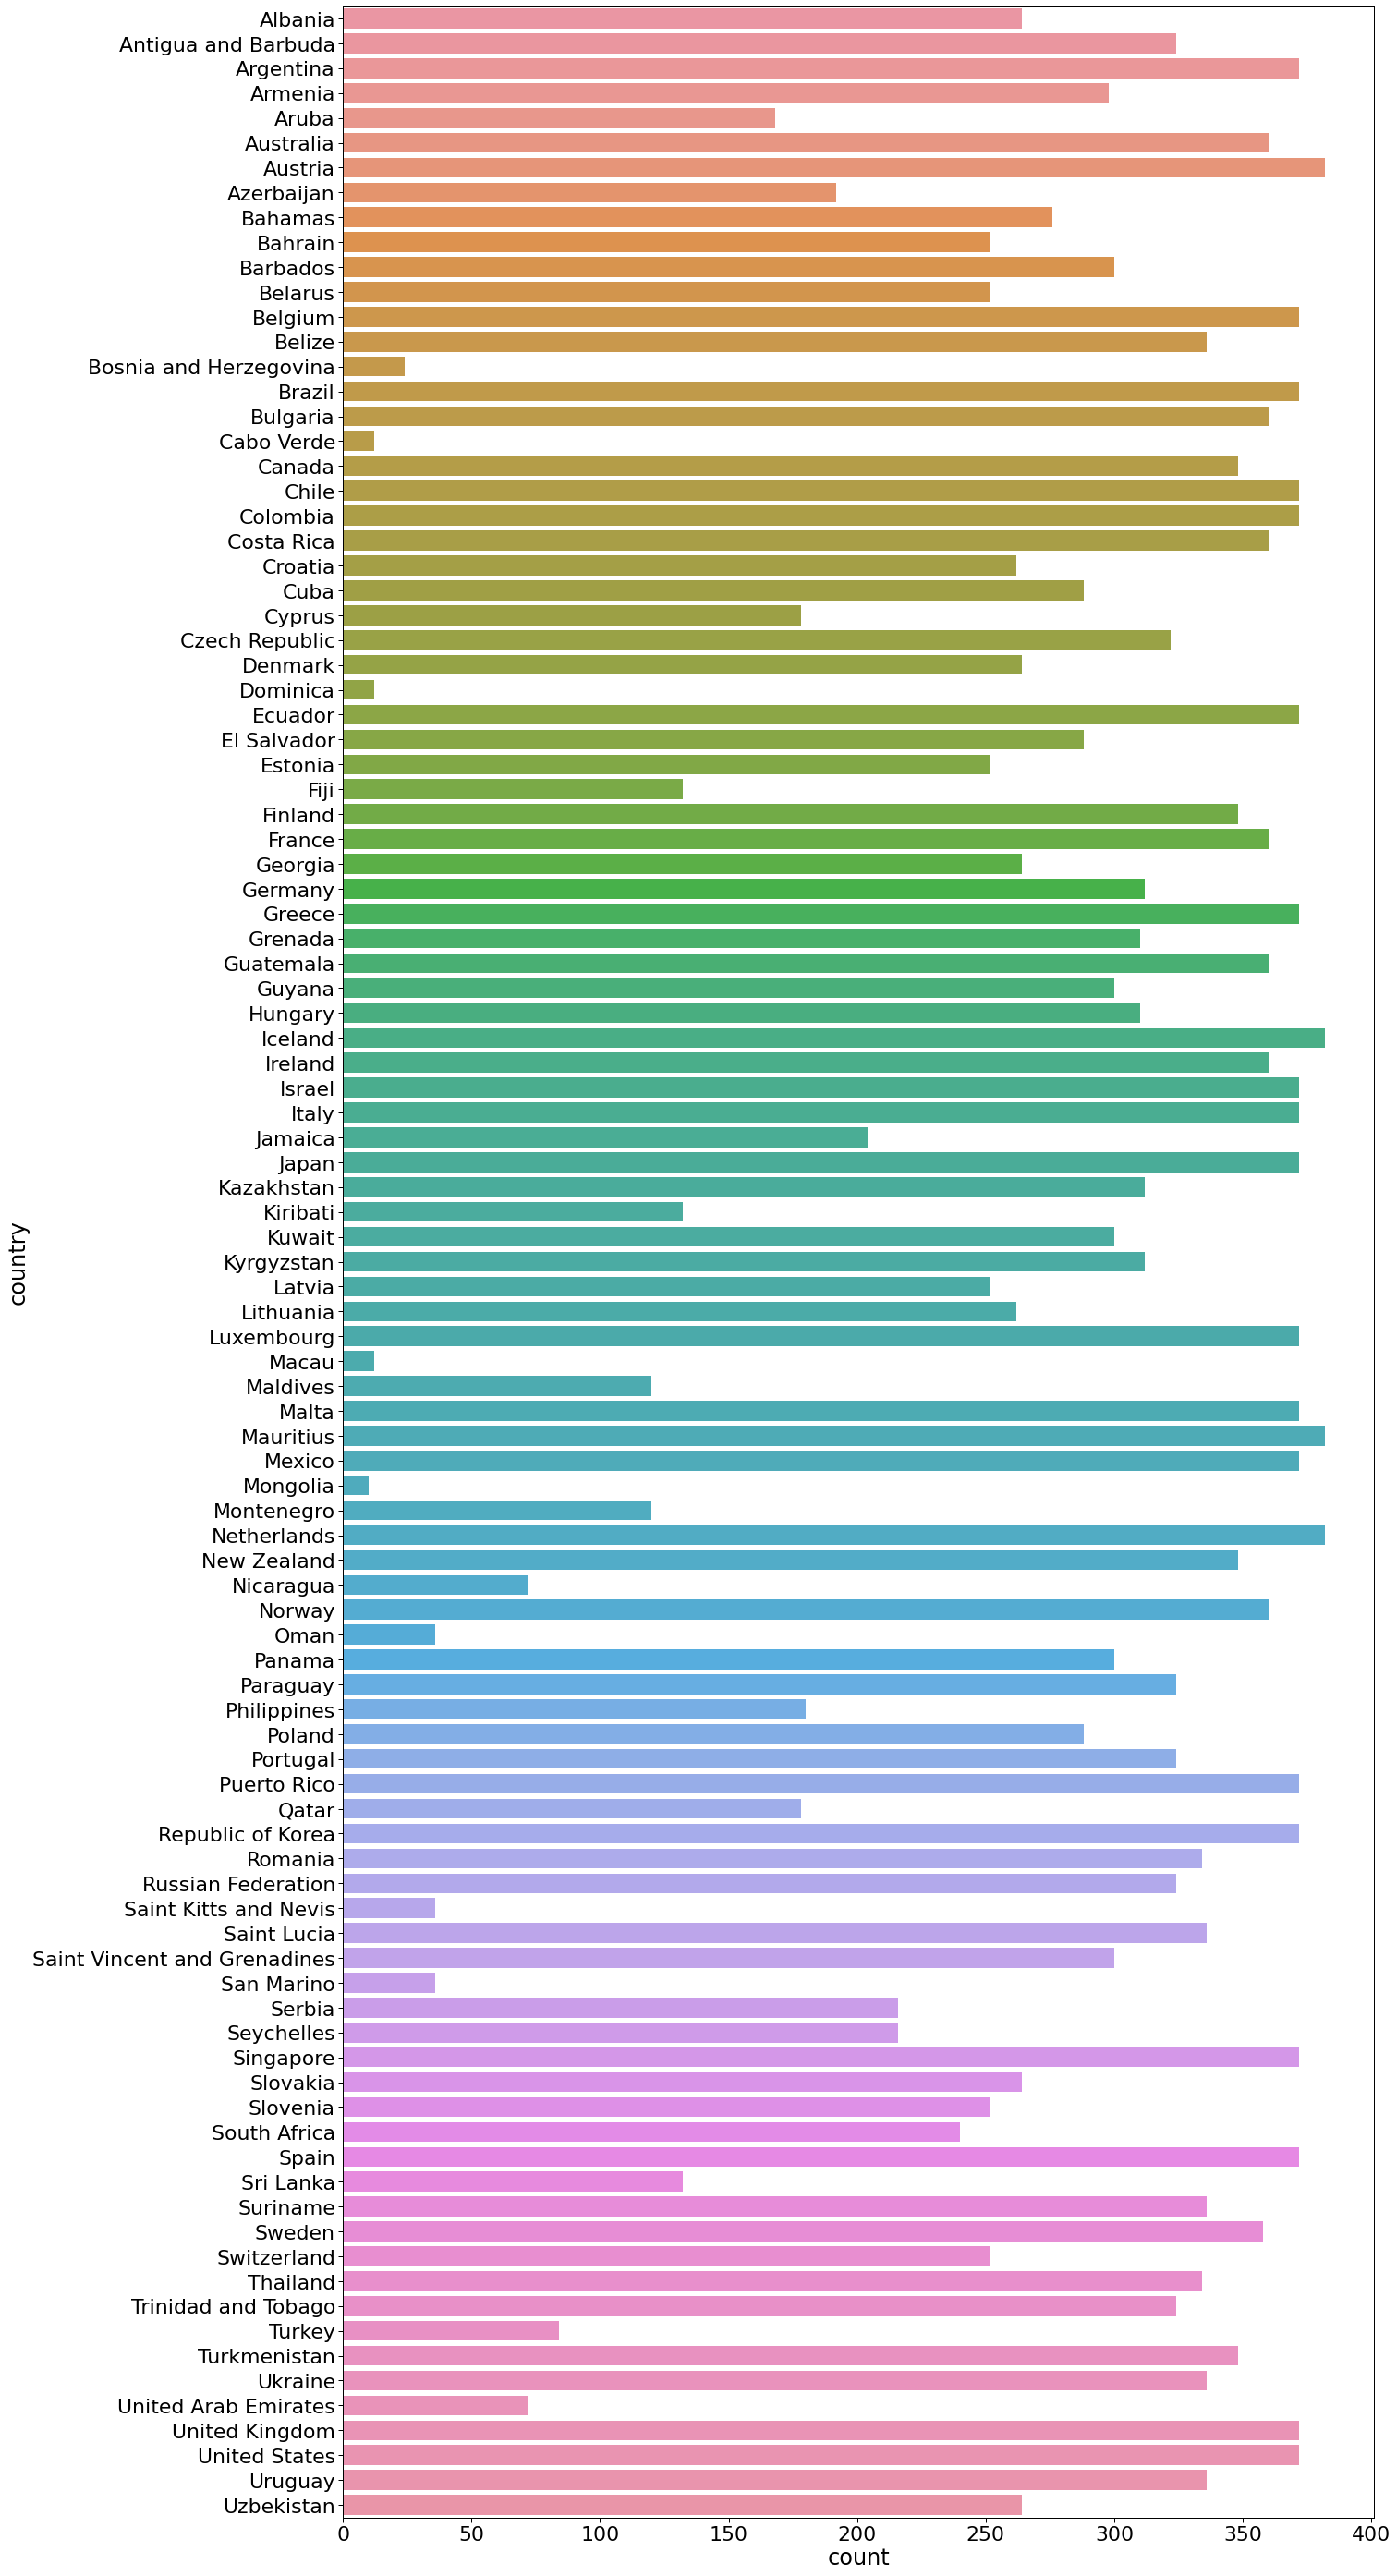

In [30]:
plt.figure(figsize=(20,50))
y = df['country']
sns.set_context("paper", 2.5, {"lines.linewidth": 4})
sns.countplot(y=y,label='count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


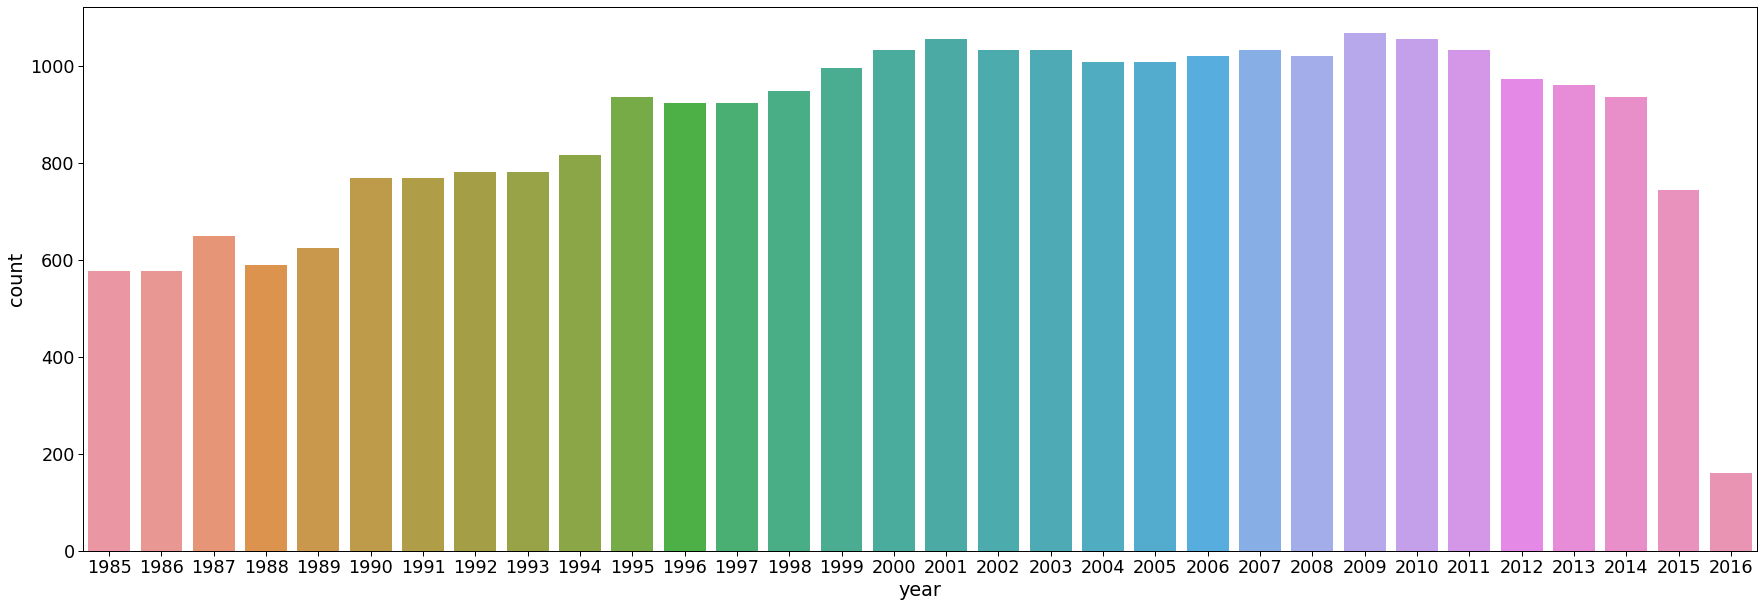

In [31]:
plt.figure(figsize=(30,10))
y = df['year']
sns.set_context("paper", 2.0, {"lines.linewidth": 4})
sns.countplot(y,label='count')

In [32]:
gender_wise = pd.DataFrame(df.groupby('sex')['suicides_no'].sum())
gender_wise

,suicides_no
sex,
female,1559510
male,5188910


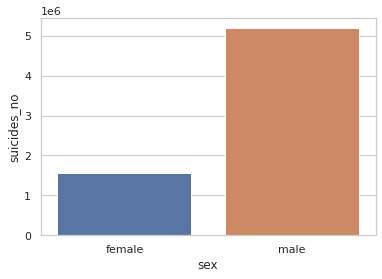

In [33]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=gender_wise.index, y="suicides_no", data=gender_wise)

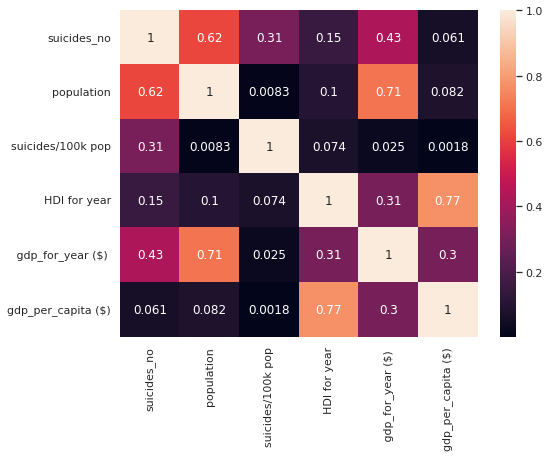

In [34]:
plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot = True);

Global Suicides(per 100K)-trend over time 1985-**2016** 


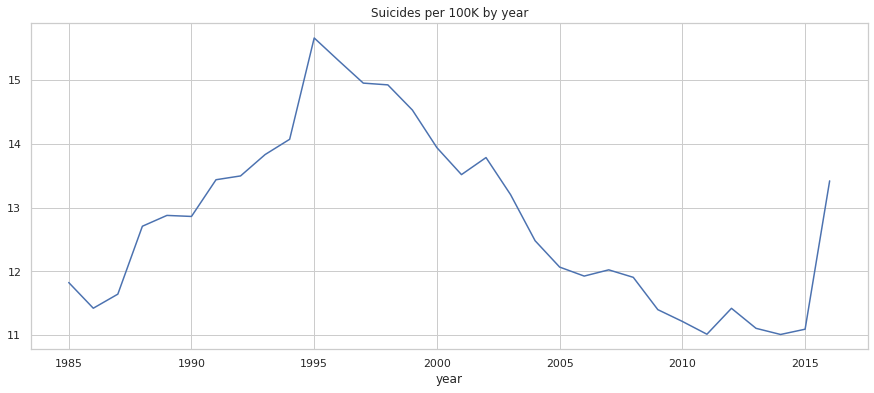

In [35]:


plt.subplots(figsize=(15,6))
df.groupby('year')["suicides/100k pop"].mean().plot.line(rot=0)
plt.title("Suicides per 100K by year");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


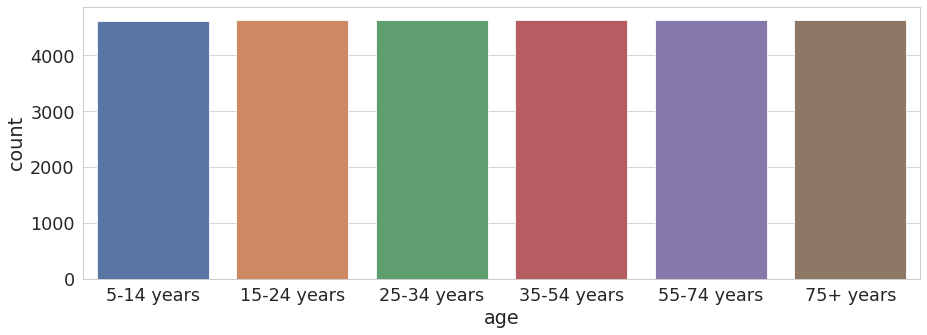

In [36]:
plt.figure(figsize=(15,5))
y = df['age']
sns.set_context("paper", 2.0, {"lines.linewidth": 4})
sns.countplot(y,label='count',order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])

The number of data for each age is almost the same too.


In [37]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


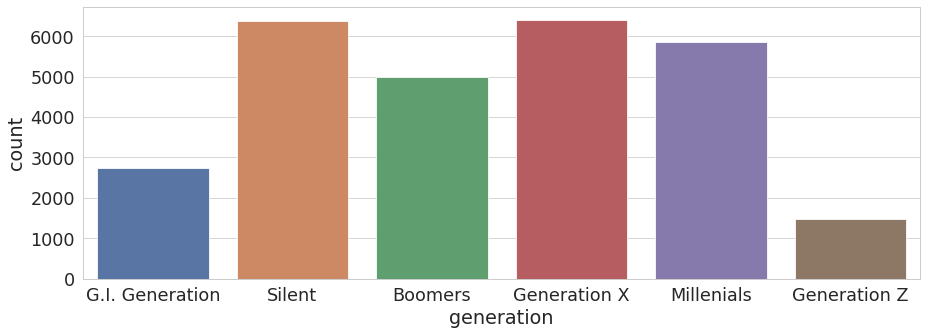

In [38]:
plt.figure(figsize=(15,5))
y = df['generation']
sns.set_context("paper", 2.0, {"lines.linewidth": 4})
sns.countplot(y,label='generation',order=['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'])

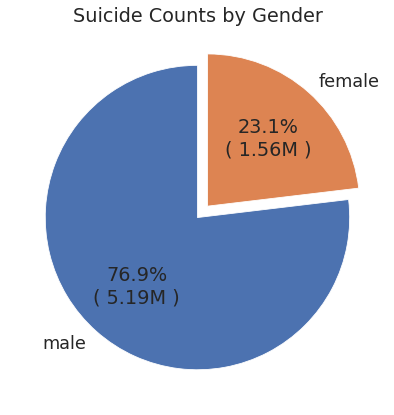

In [39]:
def func(a, b):
    absolute = int(round(a/100.*np.sum(b)))
    return "{:.1f}%\n( {:.2f}M )".format(a,round(absolute/1000000,2))

suicide_counts_by_sex = df.groupby('sex').suicides_no.sum()

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(x = suicide_counts_by_sex.values[::-1], 
        labels=suicide_counts_by_sex.index[::-1], 
       explode=(0, 0.1),
       autopct=lambda pct: func(pct, suicide_counts_by_sex.values[::-1]),
       startangle=90)
ax.set_title("Suicide Counts by Gender");
plt.show()

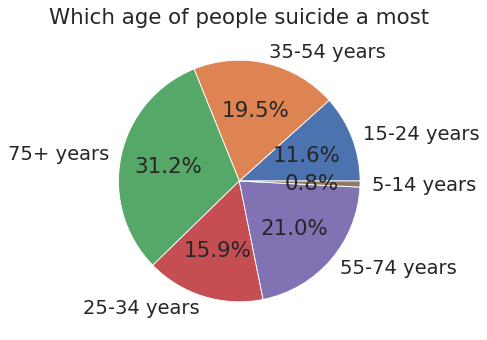

In [40]:
AgeMean=[]
for i in (df.age.unique()):
    new4=df[df['age']==i]
    AgeMean.append(new4['suicides/100k pop'].mean())

x=[i for i in AgeMean]
plt.figure(figsize=(10,5),dpi=80)
plt.pie(x,labels=[i for i in df.age.unique()],autopct='%1.1f%%')
plt.title('Which age of people suicide a most')
plt.show()

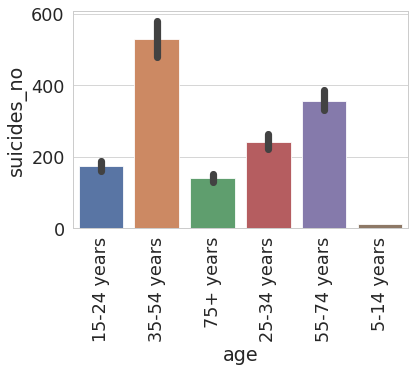

In [41]:
sns.barplot(x="age",y = 'suicides_no',data=df);
plt.xticks(rotation=90);

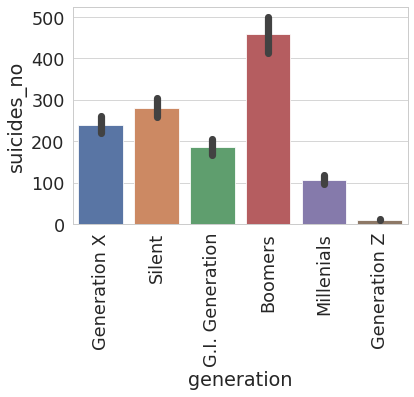

In [42]:
sns.barplot(x="generation",y = 'suicides_no',data=df);
plt.xticks(rotation=90);

**CONCLUSION BY OBSERVING ABOVE ANALYSIS**

Men are more suicidal than women.

 people at age of 35-54 years suicide most.

if gdp low then sucides is high

genearation boomers phase having high sucides


In [43]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [44]:
df2 = df

In [45]:
df2


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z


In [46]:
df2.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [47]:
df3 = df2.drop(['country','country-year','generation','suicides_no'], axis = 1) 
df3 = df3.drop(['HDI for year'], axis = 1)

In [48]:
df3.head()

,year,sex,age,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,1987,male,15-24 years,312900,6.71,2156624900,796
1,1987,male,35-54 years,308000,5.19,2156624900,796
2,1987,female,15-24 years,289700,4.83,2156624900,796
3,1987,male,75+ years,21800,4.59,2156624900,796
4,1987,male,25-34 years,274300,3.28,2156624900,796


converting sex,age,year into One hot encoding techniques


In [49]:
df3 = pd.concat([df3,pd.get_dummies(df3['sex'], prefix='sex',drop_first=True)],axis=1).drop(['sex'],axis=1)
df3.head()

,year,age,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),sex_male
0,1987,15-24 years,312900,6.71,2156624900,796,1
1,1987,35-54 years,308000,5.19,2156624900,796,1
2,1987,15-24 years,289700,4.83,2156624900,796,0
3,1987,75+ years,21800,4.59,2156624900,796,1
4,1987,25-34 years,274300,3.28,2156624900,796,1


In [50]:
df3 = pd.concat([df3,pd.get_dummies(df3['age'], prefix='age',drop_first=True)],axis=1).drop(['age'],axis=1)
df3.head()

,year,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
0,1987,312900,6.71,2156624900,796,1,0,0,0,0,0
1,1987,308000,5.19,2156624900,796,1,0,1,0,0,0
2,1987,289700,4.83,2156624900,796,0,0,0,0,0,0
3,1987,21800,4.59,2156624900,796,1,0,0,0,0,1
4,1987,274300,3.28,2156624900,796,1,1,0,0,0,0


In [51]:
df3 = pd.concat([df3,pd.get_dummies(df3['year'], prefix='year',drop_first=True)],axis=1).drop(['year'],axis=1)
df3.head()

,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016
0,312900,6.71,2156624900,796,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,308000,5.19,2156624900,796,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,289700,4.83,2156624900,796,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21800,4.59,2156624900,796,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,274300,3.28,2156624900,796,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
df3.shape

(27820, 41)

In [53]:
df2.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

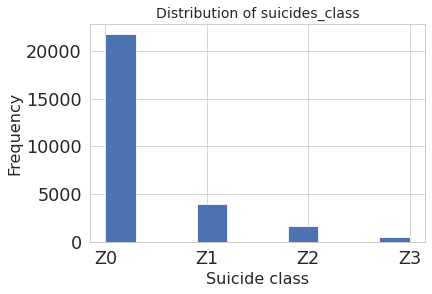

In [54]:
data = df
data['suicides_class'] = pd.cut(x=df['suicides/100k pop'], bins=[-0.1,19, 39, 79, 500], labels=['Z0', 'Z1', 'Z2','Z3'])

plt.hist(data['suicides_class'])
plt.title("Distribution of suicides_class", fontsize=14)
plt.xlabel('Suicide class', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.show()

In [55]:
data['suicides_class'].head()

0    Z0
1    Z0
2    Z0
3    Z0
4    Z0
Name: suicides_class, dtype: category
Categories (4, object): ['Z0' < 'Z1' < 'Z2' < 'Z3']

In [56]:
from sklearn.utils import resample

df_majority = data[data.suicides_class=="Z0"]
df_minority1 = data[data.suicides_class=="Z1"]
df_minority2 = data[data.suicides_class=="Z2"]
df_minority3 = data[data.suicides_class=="Z3"]

In [57]:
# Upsample minority class
df_minority1_upsampled = resample(df_minority1, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
df_minority2_upsampled = resample(df_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
df_minority3_upsampled = resample(df_minority3, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority1_upsampled, df_minority2_upsampled, df_minority3_upsampled])

In [58]:
df_minority1_upsampled.size

282711

Text(0, 0.5, 'Frequency')

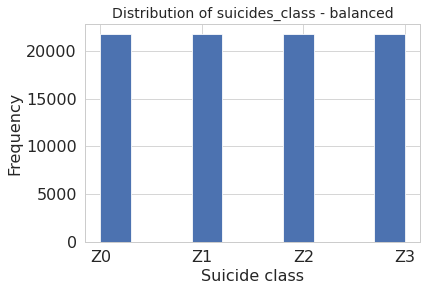

In [59]:
plt.hist(df_upsampled['suicides_class'])
plt.title("Distribution of suicides_class - balanced", fontsize=14)
plt.xlabel('Suicide class', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [60]:
data = df_upsampled
data2 = data.drop(['country','country-year','generation','suicides_no','suicides/100k pop'], axis = 1)

In [61]:
data2.head()

,year,sex,age,population,HDI for year,gdp_for_year ($),gdp_per_capita ($),suicides_class
0,1987,male,15-24 years,312900,NaN,2156624900,796,Z0
1,1987,male,35-54 years,308000,NaN,2156624900,796,Z0
2,1987,female,15-24 years,289700,NaN,2156624900,796,Z0
3,1987,male,75+ years,21800,NaN,2156624900,796,Z0
4,1987,male,25-34 years,274300,NaN,2156624900,796,Z0


In [62]:
data2 = pd.concat([data2,pd.get_dummies(data2['sex'], prefix='sex',drop_first=True)],axis=1).drop(['sex'],axis=1)


#Converting age into onehot encoding

data2 = pd.concat([data2,pd.get_dummies(data2['age'], prefix='age',drop_first=True)],axis=1).drop(['age'],axis=1)



data2 = pd.concat([data2,pd.get_dummies(data2['year'], prefix='year',drop_first=True)],axis=1).drop(['year'],axis=1)
data2.head()

,population,HDI for year,gdp_for_year ($),gdp_per_capita ($),suicides_class,sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016
0,312900,NaN,2156624900,796,Z0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,308000,NaN,2156624900,796,Z0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,289700,NaN,2156624900,796,Z0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21800,NaN,2156624900,796,Z0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,274300,NaN,2156624900,796,Z0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
data2=data2.dropna()

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data2.drop(['suicides_class'],axis=1), data2.suicides_class, test_size=0.25,random_state=5)

In [65]:
X_train

,population,HDI for year,gdp_for_year ($),gdp_per_capita ($),sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016
16520,96237,0.775,12129642296,10572,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
24310,68450,0.707,4368398048,9176,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5453,277903,0.752,77860932152,5584,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6428,74000,0.749,21774273832,5288,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11915,41539,0.889,16691490114,60712,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26165,4375300,0.662,48213868178,996,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12544,631000,0.817,100343219507,20159,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26166,6306200,0.662,48213868178,996,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8584,97957,0.861,26224622451,21117,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


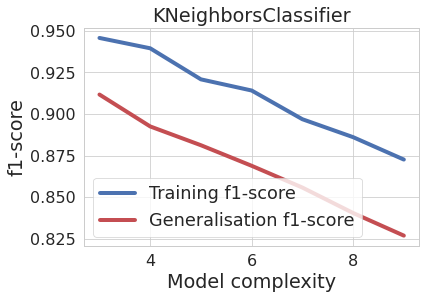

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

complexities = []
train_errors = []
test_errors = []
for neighbour in range(3,10):
    clf = KNeighborsClassifier(n_neighbors=neighbour)
    clf.fit(X_train, y_train)
    complexities.append(neighbour)
    train_errors.append(f1_score(y_train, clf.predict(X_train), average='macro'))
    test_errors.append(f1_score(y_test, clf.predict(X_test), average='macro'))
plt.plot(complexities, train_errors, c='b', label='Training f1-score')
plt.plot(complexities, test_errors, c='r', label='Generalisation f1-score')
plt.ylabel('f1-score')
plt.xlabel('Model complexity')
plt.title('KNeighborsClassifier')
plt.legend()
plt.show()
plt.close()

In [68]:
clf.score(X_train, y_train)

0.8677487728692548

In [67]:
 clf.score(X_test,y_test)

0.8194444444444444

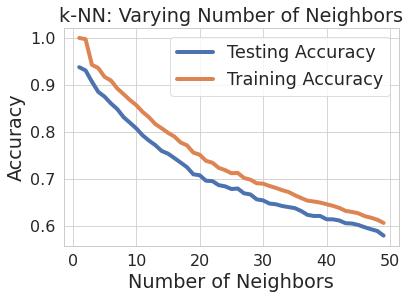

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

no_neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [78]:
df_train = pd.read_csv("train (1).csv")
df_test = pd.read_csv("test.csv")

In [80]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [79]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [81]:
from pycaret import classification
classification_setup = classification.setup(data=df_train,target='Survived', ignore_features = ['Ticket', 'Name', 'PassengerId'], silent = True)

,Description,Value
0,session_id,6252
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [159]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8156,0.8583,0.6656,0.8236,0.7334,0.5954,0.6053,0.169
lr,Logistic Regression,0.8060,0.8489,0.7034,0.7789,0.7367,0.5840,0.5882,0.195
ridge,Ridge Classifier,0.8011,0.0000,0.6949,0.7720,0.7287,0.5726,0.5771,0.018
lda,Linear Discriminant Analysis,0.7995,0.8318,0.6949,0.7674,0.7267,0.5693,0.5734,0.036
lightgbm,Light Gradient Boosting Machine,0.7949,0.8562,0.6991,0.7531,0.7232,0.5610,0.5637,0.052
rf,Random Forest Classifier,0.7835,0.8536,0.6699,0.7474,0.7028,0.5341,0.5393,0.518
et,Extra Trees Classifier,0.7755,0.8367,0.6658,0.7380,0.6958,0.5195,0.5247,0.504
ada,Ada Boost Classifier,0.7722,0.8140,0.6908,0.7123,0.6985,0.5161,0.5191,0.132
dt,Decision Tree Classifier,0.7626,0.7498,0.6824,0.6986,0.6868,0.4965,0.4998,0.022
knn,K Neighbors Classifier,0.6920,0.7256,0.5319,0.6189,0.5653,0.3315,0.3371,0.121


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6252, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [160]:
from pycaret.classification import *
models()
#compare_models(whitelist = models(type='ensemble').index.tolist())

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [163]:
compare_models(models(type='ensemble').index.tolist())

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8156,0.8583,0.6656,0.8236,0.7334,0.5954,0.6053,0.169
lightgbm,Light Gradient Boosting Machine,0.7949,0.8562,0.6991,0.7531,0.7232,0.5610,0.5637,0.052
rf,Random Forest Classifier,0.7835,0.8536,0.6699,0.7474,0.7028,0.5341,0.5393,0.521
et,Extra Trees Classifier,0.7755,0.8367,0.6658,0.7380,0.6958,0.5195,0.5247,0.507
ada,Ada Boost Classifier,0.7722,0.8140,0.6908,0.7123,0.6985,0.5161,0.5191,0.129


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6252, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [164]:
GradientBoostingClassifier = classification.create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7937,0.8408,0.5833,0.8235,0.6829,0.5365,0.5540
1,0.6984,0.8050,0.5833,0.6087,0.5957,0.3554,0.3556
2,0.8413,0.8419,0.7500,0.8182,0.7826,0.6580,0.6595
3,0.8548,0.8946,0.7391,0.8500,0.7907,0.6804,0.6843
4,0.8226,0.8953,0.7083,0.8095,0.7556,0.6173,0.6207
5,0.7903,0.8196,0.5417,0.8667,0.6667,0.5253,0.5562
6,0.7581,0.7582,0.5417,0.7647,0.6341,0.4612,0.4765
7,0.8548,0.9068,0.7083,0.8947,0.7907,0.6819,0.6928
8,0.8871,0.9550,0.7917,0.9048,0.8444,0.7565,0.7606
9,0.8548,0.8657,0.7083,0.8947,0.7907,0.6819,0.6928


In [165]:
result = predict_model(GradientBoostingClassifier)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8172,0.8711,0.6893,0.8068,0.7435,0.6028,0.6073


In [166]:
params = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],
          'n_estimators':[100,250,500,750,1000,1250,1500,1750]
          }

#tune_gbc = classification.tune_model(GradientBoostingClassifier, custom_grid = params)

In [167]:
tune_gbc = classification.tune_model(GradientBoostingClassifier, custom_grid = params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7937,0.8408,0.5833,0.8235,0.6829,0.5365,0.5540
1,0.6984,0.8050,0.5833,0.6087,0.5957,0.3554,0.3556
2,0.8413,0.8419,0.7500,0.8182,0.7826,0.6580,0.6595
3,0.8548,0.8946,0.7391,0.8500,0.7907,0.6804,0.6843
4,0.8226,0.8953,0.7083,0.8095,0.7556,0.6173,0.6207
5,0.7903,0.8196,0.5417,0.8667,0.6667,0.5253,0.5562
6,0.7581,0.7582,0.5417,0.7647,0.6341,0.4612,0.4765
7,0.8548,0.9068,0.7083,0.8947,0.7907,0.6819,0.6928
8,0.8871,0.9550,0.7917,0.9048,0.8444,0.7565,0.7606
9,0.8548,0.8657,0.7083,0.8947,0.7907,0.6819,0.6928


In [168]:
lgb_classifier = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6984,0.7831,0.6250,0.6000,0.6122,0.3657,0.3659
1,0.6825,0.7895,0.5833,0.5833,0.5833,0.3269,0.3269
2,0.7778,0.8782,0.7500,0.6923,0.7200,0.5363,0.5375
3,0.8710,0.8528,0.7826,0.8571,0.8182,0.7185,0.7203
4,0.8387,0.9123,0.7500,0.8182,0.7826,0.6548,0.6564
5,0.7419,0.7895,0.5833,0.7000,0.6364,0.4389,0.4433
6,0.7258,0.8114,0.5417,0.6842,0.6047,0.3991,0.4055
7,0.8548,0.9178,0.7083,0.8947,0.7907,0.6819,0.6928
8,0.9032,0.9408,0.8750,0.8750,0.8750,0.7961,0.7961
9,0.8548,0.8871,0.7917,0.8261,0.8085,0.6917,0.6921


In [170]:
params = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],
          'n_estimators':[100,250,500,750,1000,1250,1500,1750],
          'max_depth': np.random.randint(1, (len(df_train.columns)*.85),20),
          'max_features': np.random.randint(1, len(df_train.columns),20),
          'min_samples_split':[2,4,6,8,10,20,40,60,100], 
          'min_samples_leaf':[1,3,5,7,9],
          'criterion': ["gini", "entropy"]}

tune_lgb = tune_model(lgb_classifier, custom_grid = params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7937,0.8429,0.6250,0.7895,0.6977,0.5442,0.5528
1,0.7143,0.8034,0.5833,0.6364,0.6087,0.3844,0.3853
2,0.8413,0.8670,0.7917,0.7917,0.7917,0.6635,0.6635
3,0.8387,0.8802,0.7826,0.7826,0.7826,0.6544,0.6544
4,0.8065,0.9024,0.6667,0.8000,0.7273,0.5792,0.5850
5,0.7742,0.8246,0.5417,0.8125,0.6500,0.4930,0.5151
6,0.7581,0.7939,0.5417,0.7647,0.6341,0.4612,0.4765
7,0.8548,0.9156,0.7083,0.8947,0.7907,0.6819,0.6928
8,0.8710,0.9507,0.7917,0.8636,0.8261,0.7238,0.7256
9,0.8710,0.8745,0.7500,0.9000,0.8182,0.7195,0.7266


**CONCLUSION**

I had performed Hyperparameter tuning for two models

In GradientBoostingClassifier before and after the tuning were same but in second model "Light Gradient Boosting Machine" compare to to before tuning and after tuning there is aproximately 2% increases after tuning
